# <center>Delivery Time Prediction</center>


The aim of this project is to predict the delivery time of goods, such as food and drinks, given certain constraints, like traffic and the location of the restaurant and the delivery place. This topic within Supply Chain Management was chosen as I believe that accuratly predicting delivery time can have a big influence in how satisfied the customers are.

A dataset from kaggle is used, available in [Food Delivery Dataset](https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset). This page contains three different files, but only the train.csv will be used, as it has more than enough observations.

This dataset contains data from 45593 deliveries made in 2022, between February and April, being most observations from March.

A brief description of the variables follows:
- **ID** - ID of the order
- **Delivery_person_ID** - ID of the person who made the delivery
- **Delivery_person_Age** - Age of the person who made the delivery
- **Delivery_person_Ratings** - Rating given to the person who made the delivery
- **Restaurant_latitude & Restaurant_longitude** - Coordinates of the restaurant where the order was made
- **Delivery_location_latitude & Delivery_location_longitude** - Coordinates of the place for the order to be delivered
- **Time_Orderd** - Time at which the order was placed
- **Time_Order_picked** - Time at which the order was picked-up by the deliverer
- **Weatherconditions** - Weather Conditions at the time of the delivery
- **Road_traffic_density** - How intense traffic was at the time of the delivery
- **Vehicle_condition** - How good the condition of the vehicle driven by the deliverer was 
- **Type_of_order** - Type of order that was made
- **Type_of_vehicle** - Type of vehicle used to deliverer the order
- **multiple_deliveries** - Shows how many multiple deliveries were made
- **Festival** - If the delivery was made from a festival or not
- **City** - What type of city was the delivery made to
- **Time_taken(min)** - Time taken to make the delivery, in minutes

This notebook will consist of sections: the first one, where the necessary libraries and data will be imported, and where a brief exploration will be held. Follows ***Exploratory Data Analysis***, which will include subsections such as ***Missing Values*** treatment, ***Outliers***, ***Feature Engineering*** and some ***Visualisations***. After the preprocessing, a ***Training & Testing*** section follows, were different Machine Learning and Deep Learning models will be applied, aiming to predict **Time_taken(min)**.

To measure the success of this task, the R-Squared, Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics will be used, as they are adequate for regression tasks.

# Table of Contents

1. [Importing Data & Libraries](#1.-Importing-Data-&-Libraries)

    1.1 [Libraries](#1.1-Libraries)
    
    1.2 [Data](#1.2-Importing-Data)
    
    1.3 [Initial Exploration](#1.3-Initial-Exploration) <br><br>
    
2. [Exploratory Data Analysis](#2.Exploratory-Data-Analysis)

    2.1 [Missing Values](#2.1-Missing-Values)
    
    2.2 [Duplicates](#2.2-Duplicates)
    
    2.3 [Feature Engineering](#2.3-Feature-Engineering)
    
    2.4 [Outliers](#2.4-Outliers)
    
    2.5 [Visualisations](#2.5-Visualisations)
    
    2.6 [Correlation Matrix](#C2.6-Correlation-Matrix)

IDEAS

- encode text variables 
- compute distance from restaurant to delivery place
- linear reg relating distance to time
- predict time taken

- verify coordinates exist
- see if there are minors making deliveries

## 1.Importing Data & Libraries

## 1.1 Libraries

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importing py file
import functions

# Train - Test Split
from sklearn.model_selection import train_test_split

# Feature Selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_regression

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Training
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)
# Visualisations --> REMOVE FROM HERE
#palette = sns.color_palette("Blues_d", len(data['Delivery_person_Age'].unique()))

## 1.2 Importing Data

In [75]:
data = pd.read_csv('/Users/antoniooliveira/Downloads/assignment 3/train.csv')

data.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


## 1.3 Initial Exploration

**Describe and Info**

In [76]:
data.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

**Unique Values**

In [78]:
data.nunique()

ID                             45593
Delivery_person_ID              1320
Delivery_person_Age               23
Delivery_person_Ratings           29
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Order_Date                        44
Time_Orderd                      177
Time_Order_picked                193
Weatherconditions                  7
Road_traffic_density               5
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                5
Festival                           3
City                               4
Time_taken(min)                   45
dtype: int64

In [79]:
list_ = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 
        'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City']

# Assuming 'columns_list' is the list of columns you want to check for unique values
for value in list_:
    unique_values = data[value].unique()
    print(f"Unique values in column '{value}': \n {unique_values} \n\n")



Unique values in column 'Delivery_person_Age': 
 ['37' '34' '23' '38' '32' '22' '33' '35' '36' '21' '24' '29' '25' '31'
 '27' '26' '20' 'NaN ' '28' '39' '30' '15' '50'] 


Unique values in column 'Delivery_person_Ratings': 
 ['4.9' '4.5' '4.4' '4.7' '4.6' '4.8' '4.2' '4.3' '4' '4.1' '5' '3.5'
 'NaN ' '3.8' '3.9' '3.7' '2.6' '2.5' '3.6' '3.1' '2.7' '1' '3.2' '3.3'
 '6' '3.4' '2.8' '2.9' '3'] 


Unique values in column 'Weatherconditions': 
 ['conditions Sunny' 'conditions Stormy' 'conditions Sandstorms'
 'conditions Cloudy' 'conditions Fog' 'conditions Windy' 'conditions NaN'] 


Unique values in column 'Road_traffic_density': 
 ['High ' 'Jam ' 'Low ' 'Medium ' 'NaN '] 


Unique values in column 'Vehicle_condition': 
 [2 0 1 3] 


Unique values in column 'Type_of_order': 
 ['Snack ' 'Drinks ' 'Buffet ' 'Meal '] 


Unique values in column 'Type_of_vehicle': 
 ['motorcycle ' 'scooter ' 'electric_scooter ' 'bicycle '] 


Unique values in column 'multiple_deliveries': 
 ['0' '1' '3' 'NaN ' 

** **

## 2. Exploratory Data Analysis

### 2.1 Missing Values

In [80]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

Even though no missing values are shown, there are strange values in several variables

In [81]:
example = data.iloc[42] 
example

# Delivery_person_Age, Delivery_person_Ratings and Time_Orderd are missing

ID                                        0x4f0 
Delivery_person_ID                MUMRES17DEL02 
Delivery_person_Age                         NaN 
Delivery_person_Ratings                     NaN 
Restaurant_latitude                    19.121999
Restaurant_longitude                   72.908493
Delivery_location_latitude             19.201999
Delivery_location_longitude            72.988493
Order_Date                            06-04-2022
Time_Orderd                                 NaN 
Time_Order_picked                       18:35:00
Weatherconditions              conditions Cloudy
Road_traffic_density                     Medium 
Vehicle_condition                              1
Type_of_order                            Drinks 
Type_of_vehicle                         scooter 
multiple_deliveries                            1
Festival                                     No 
City                              Metropolitian 
Time_taken(min)                         (min) 33
Name: 42, dtype: obj

By taking a closer look at the unique values in the previous section, one can conclude that all values NaN have a space right after it, making it impossible for the method .isna() to find them. As so, we will now look and remove specifically for values = 'NaN '.

In [82]:
data = data[~(data == 'NaN ').any(axis=1)]

In [83]:
# Verifying the success of the operation
for i in data.columns:
    if (data[i] == 'NaN ').any():
        print('Error in column:', i)
    else:
        print('Success in column:', i)


Success in column: ID
Success in column: Delivery_person_ID
Success in column: Delivery_person_Age
Success in column: Delivery_person_Ratings
Success in column: Restaurant_latitude
Success in column: Restaurant_longitude
Success in column: Delivery_location_latitude
Success in column: Delivery_location_longitude
Success in column: Order_Date
Success in column: Time_Orderd
Success in column: Time_Order_picked
Success in column: Weatherconditions
Success in column: Road_traffic_density
Success in column: Vehicle_condition
Success in column: Type_of_order
Success in column: Type_of_vehicle
Success in column: multiple_deliveries
Success in column: Festival
Success in column: City
Success in column: Time_taken(min)


### 2.2 Duplicates

In [84]:
data[data.duplicated()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)


As no duplicates were found, we continue for the  Feature Engineering section

### 2.3 Feature Engineering

**Delivery Person Age**

In [85]:
# Delivery_person_Age to INT
data['Delivery_person_Age'] = data['Delivery_person_Age'].astype(int)

**Delivery Person Ratings**

In [86]:
# Delivery_person_Ratings to FLOAT
data['Delivery_person_Ratings'] = data['Delivery_person_Ratings'].astype(float)

**Order Date**

In [87]:
# Changing Order_date to be in datetime format
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%d-%m-%Y')

As the format has now changed, we are able to extract the Month, Day and Day of the week as new variables

In [88]:
data['Day'] = data['Order_Date'].dt.day
data['Month'] = data['Order_Date'].dt.month
#data['Year'] = data['Order_Date'].dt.year
data['Day_of_week'] = data['Order_Date'].dt.dayofweek  # Monday=0, Sunday=6

Since in this Dataset all information was obtained from 2022, the Year will not be computed.

With this information, Order_date can be dropped

In [89]:
data = data.drop('Order_Date', axis = 1)

**Time Ordered**

In [118]:
# Convert 'Time_Orderd' column to datetime format
data['Time_Ordered_dt'] = pd.to_datetime(data['Time_Orderd'], 
                                        format = '%H:%M:%S')

# Extract hour of the day
data['Hour'] = data['Time_Ordered_dt'].dt.hour

**Multiple deliveries**

In [90]:
data['multiple_deliveries'] = data['multiple_deliveries'].astype('int') 

To be able to use every possible variable for prediction purposes, all non-numeric variables will be encoded.

**Weather Conditions**

In [91]:
mapping1 = {
    'conditions Sandstorms': 0,
    'conditions Stormy': 1,
    'conditions Fog': 2,
    'conditions Windy': 3,
    'conditions Cloudy': 4,
    'conditions Sunny': 5
}


data['Weatherconditions_enc'] = data['Weatherconditions'].map(mapping1)



**Road Traffic Density**

In [92]:
mapping2 = {
    'Low ': 0,
    'Medium ': 1,
    'High ': 2,
    'Jam ': 3,
} 

data['Road_traffic_density_enc'] = data['Road_traffic_density'].map(mapping2)

**Type of Order**

In [93]:
mapping3 = {
    'Drinks ': 0,
    'Snack ': 1,
    'Buffet ': 2,
    'Meal ': 3,
} 

data['Type_of_order_enc'] = data['Type_of_order'].map(mapping3)

**Type of Vehicle**

In [94]:
mapping4 = {
    'motorcycle ': 0,
    'electric_scooter ': 1,
    'scooter ': 2,
}

data['Type_of_vehicle_enc'] = data['Type_of_vehicle'].map(mapping4)

**Festival**

In [95]:
binary_mapping = {'No ': 0, 'Yes ': 1}


data['Festival_enc'] = data['Festival'].map(binary_mapping)

**City**

In [96]:
mapping5 = {
    'Semi-Urban ': 0,
    'Urban ': 1,
    'Metropolitian ': 2,
}

data['City_enc'] = data['City'].map(mapping5)

**Computing Distance Between Restaurant and Delivery Place**

In the dataset there information about the Restaurant's and Delivery place's longitudes and latitudes. As so, this information will be used to compute the distance between the two places, which is easier to interpret and could yild better results later

In [97]:
data['Distance_km'] = data.apply(functions.compute_distance, axis=1)

As we now have the distance between the two places, the longitude and latitude variables will be dropped.

In [98]:
data = data.drop(['Restaurant_latitude', 'Restaurant_longitude'
                   ,'Delivery_location_latitude', 'Delivery_location_longitude'],axis = 1)

**Time Taken**

In [99]:
# removing '(min)' from Time_taken
data['Time_taken(min)'] = data['Time_taken(min)'].str.replace('(min)', '')
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Day,Month,Day_of_week,Weatherconditions_enc,Road_traffic_density_enc,Type_of_order_enc,Type_of_vehicle_enc,Festival_enc,City_enc,Distance_km
0,0x4607,INDORES13DEL02,37,4.9,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,19,3,5,5,2,1,0,0,1,3.025149
1,0xb379,BANGRES18DEL02,34,4.5,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,25,3,4,1,3,1,2,0,2,20.183530
2,0x5d6d,BANGRES19DEL01,23,4.4,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,19,3,5,0,0,0,0,0,1,1.552758
3,0x7a6a,COIMBRES13DEL02,38,4.7,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,5,4,1,5,1,2,0,0,2,7.790401
4,0x70a2,CHENRES12DEL01,32,4.6,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,26,3,5,4,2,1,2,0,2,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32,24,3,3,3,2,3,0,0,2,1.489846
45589,0xd641,AGRRES16DEL01,21,4.6,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36,16,2,2,3,3,2,0,0,2,11.007735
45590,0x4f8d,CHENRES08DEL03,30,4.9,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16,11,3,4,4,0,0,2,0,2,4.657195
45591,0x5eee,COIMBRES11DEL01,20,4.7,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26,7,3,0,4,2,1,0,0,2,6.232393


Transforming the varible to an integer

In [100]:
data['Time_taken(min)'] = data['Time_taken(min)'].astype(int)
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Day,Month,Day_of_week,Weatherconditions_enc,Road_traffic_density_enc,Type_of_order_enc,Type_of_vehicle_enc,Festival_enc,City_enc,Distance_km
0,0x4607,INDORES13DEL02,37,4.9,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,19,3,5,5,2,1,0,0,1,3.025149
1,0xb379,BANGRES18DEL02,34,4.5,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,25,3,4,1,3,1,2,0,2,20.183530
2,0x5d6d,BANGRES19DEL01,23,4.4,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,19,3,5,0,0,0,0,0,1,1.552758
3,0x7a6a,COIMBRES13DEL02,38,4.7,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,5,4,1,5,1,2,0,0,2,7.790401
4,0x70a2,CHENRES12DEL01,32,4.6,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,26,3,5,4,2,1,2,0,2,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32,24,3,3,3,2,3,0,0,2,1.489846
45589,0xd641,AGRRES16DEL01,21,4.6,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36,16,2,2,3,3,2,0,0,2,11.007735
45590,0x4f8d,CHENRES08DEL03,30,4.9,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16,11,3,4,4,0,0,2,0,2,4.657195
45591,0x5eee,COIMBRES11DEL01,20,4.7,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26,7,3,0,4,2,1,0,0,2,6.232393


### 2.4 Outliers

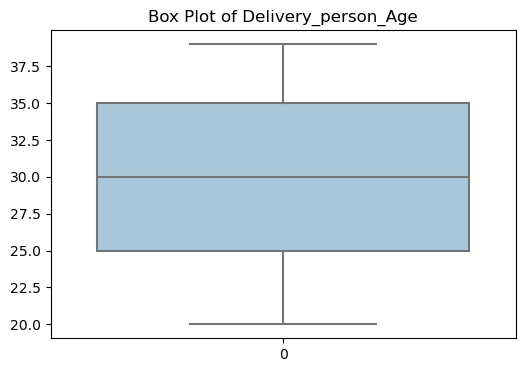

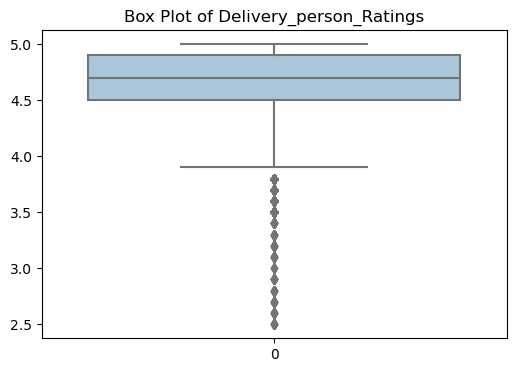

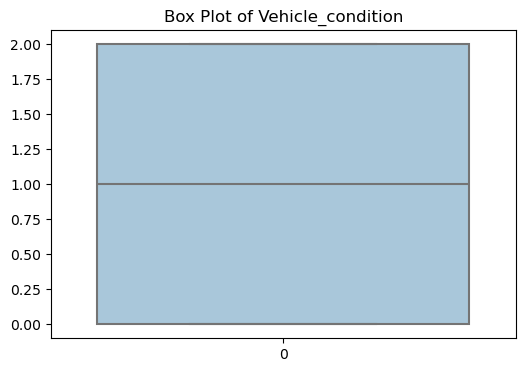

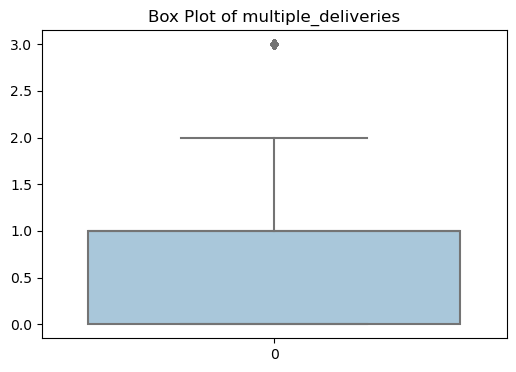

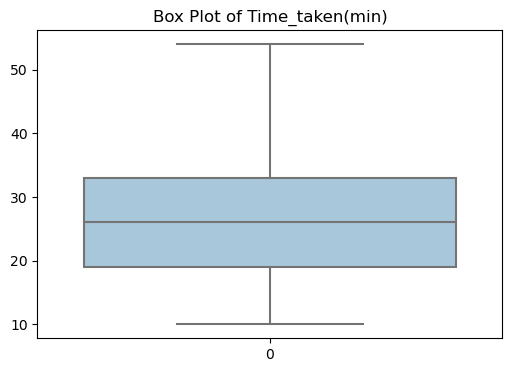

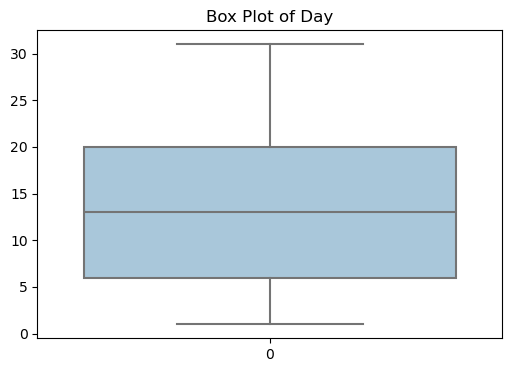

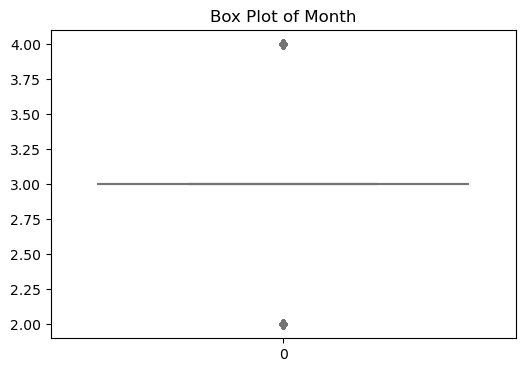

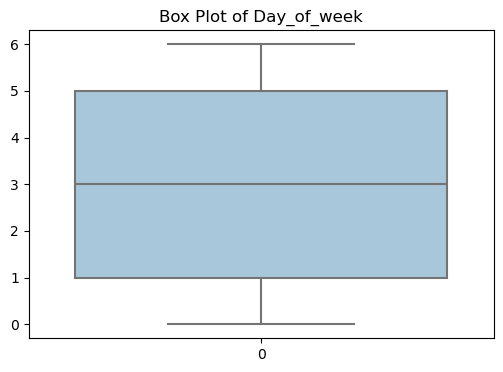

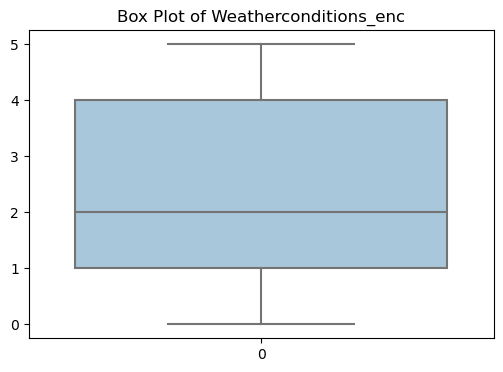

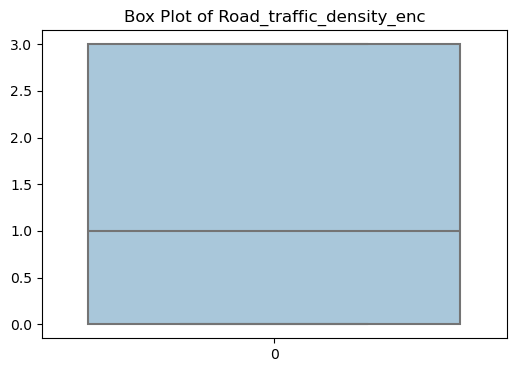

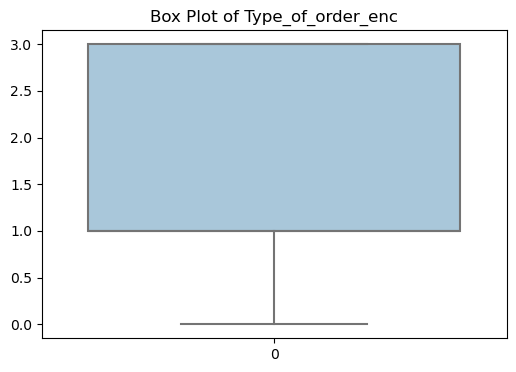

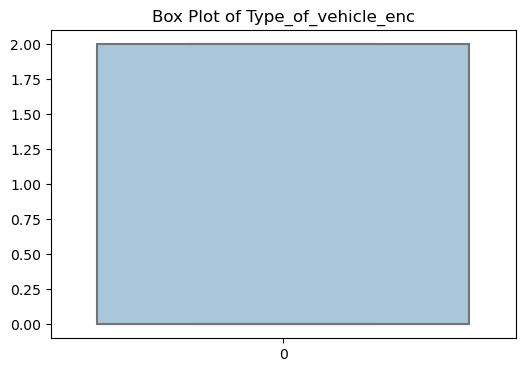

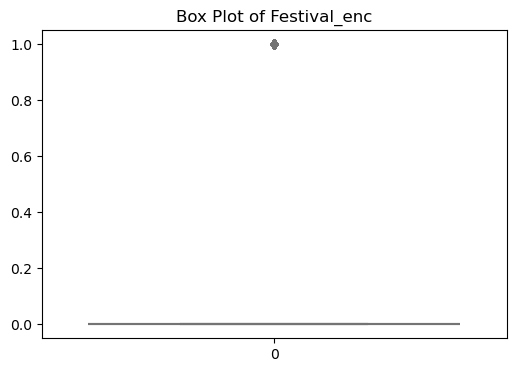

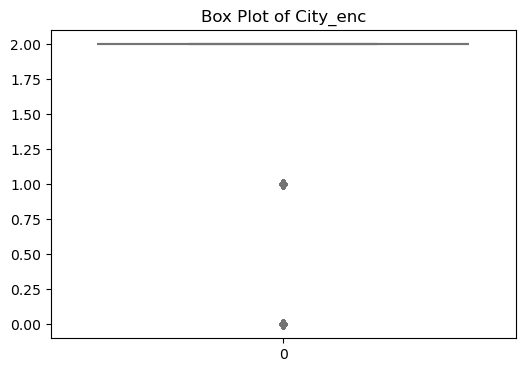

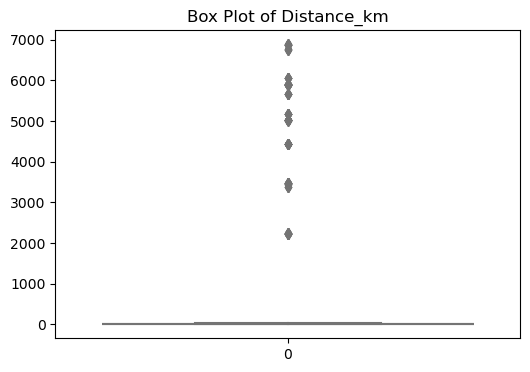

In [101]:
palette = sns.color_palette("Blues_d", len(data['Delivery_person_Age'].unique()))

# Get a list of all numeric column names
columns_to_check = data.select_dtypes(include=['int', 'float']).columns.to_list()
        
functions.plot_boxplots(data, columns_to_check, palette = palette)

As one can see, most columns do not show any outliers. Delivery_person_Ratings shows some lower ratings that look like outliers, however, since we know these are real values, it would be incorrect to remove them. As expected, binary variables such as Festival and City only show observation on 0 and 1. When looking at the month variable, one can conclude that most observations were recorded in March, but there are still some in February and April.

However, when we look at the Distance_km variable, we can see that there are particularly high values, which especially for a food delivery service, do not appear to make much sense. As so, this incoherency will be addressed next.

In [102]:
column_to_check = 'Distance_km'

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data[column_to_check].quantile(0.25)
Q3 = data[column_to_check].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data[column_to_check] < lower_bound) | (data[column_to_check] > upper_bound)]

print("Number of outliers:", len(outliers))

Number of outliers: 146


In [103]:
data[data['Distance_km'] > 100]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Day,Month,Day_of_week,Weatherconditions_enc,Road_traffic_density_enc,Type_of_order_enc,Type_of_vehicle_enc,Festival_enc,City_enc,Distance_km
92,0xc042,AGRRES010DEL01,34,4.7,23:00:00,23:05:00,conditions Sandstorms,Low,1,Drinks,scooter,0,No,Metropolitian,15,16,2,2,0,0,0,2,0,2,6048.631240
283,0xc044,AGRRES12DEL03,32,4.7,20:55:00,21:10:00,conditions Sandstorms,Jam,2,Meal,scooter,1,No,Metropolitian,31,13,2,6,0,3,3,2,0,2,6047.919478
1091,0xc086,GOARES010DEL03,20,4.7,20:00:00,20:10:00,conditions Cloudy,Jam,2,Drinks,motorcycle,1,No,Metropolitian,29,13,2,6,4,3,0,0,0,2,3464.082720
1783,0xc067,BHPRES13DEL02,39,4.5,09:15:00,09:20:00,conditions Cloudy,Low,0,Meal,motorcycle,1,No,Metropolitian,29,13,2,6,4,0,3,0,0,2,5168.516553
1976,0xc061,KOLRES16DEL01,25,4.0,09:25:00,09:30:00,conditions Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,19,15,2,1,0,0,2,0,0,2,5013.585658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43860,0xc0b9,GOARES16DEL01,32,4.6,23:10:00,23:15:00,conditions Sandstorms,Low,0,Snack,motorcycle,1,No,Metropolitian,24,18,2,4,0,0,1,0,0,2,3454.524245
44051,0xc06d,GOARES14DEL03,22,5.0,18:50:00,18:55:00,conditions Sandstorms,Medium,1,Buffet,scooter,1,No,Metropolitian,27,17,2,3,0,1,2,2,0,2,3377.651072
44640,0xc094,KOCRES06DEL03,23,4.8,19:20:00,19:35:00,conditions Sunny,Jam,0,Drinks,motorcycle,1,No,Metropolitian,21,14,2,0,5,3,0,0,0,2,2230.110757
44933,0xc0c2,AURGRES03DEL03,30,4.9,22:20:00,22:35:00,conditions Fog,Low,1,Buffet,motorcycle,0,No,Metropolitian,15,15,2,1,2,0,2,0,0,2,4423.276011


As one can see, there were 146 observations dentified as outliers, and all have a distance between restaurante and delviery place of more than 100km. If we also take a look at the time taken to deliver these goods, we can conclude that it is impossible to traverse such a long distance in so little time.

These observations may represent orders that were made by mistake in which the clients did no notice the location of the restaurant when requesting the delivery service. For example, with fast food chains that exist all around the world, people might sometimes get the address wrong and mistakenly order something in the other side of the world.

Consequently, these observations will be removed.

In [104]:
data = data[data['Distance_km'] < 100]

Rechecking how the Boxplots look again

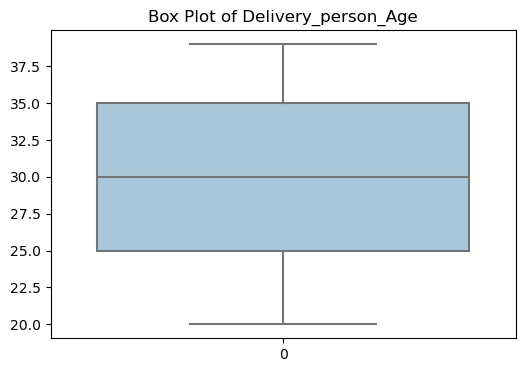

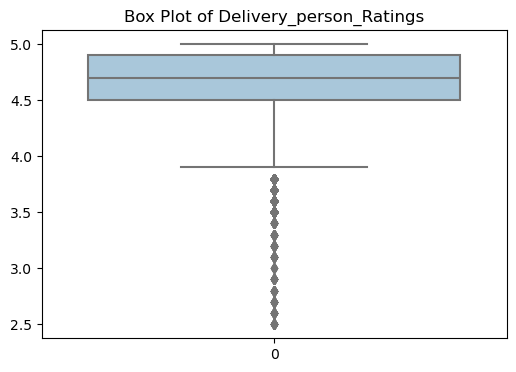

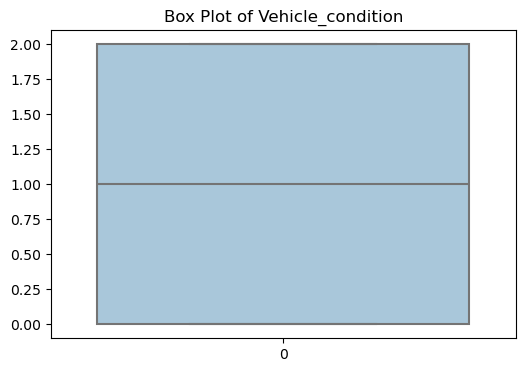

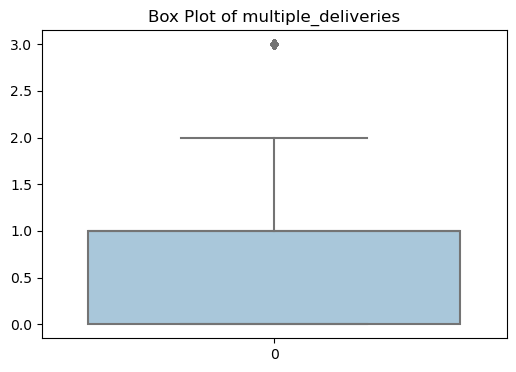

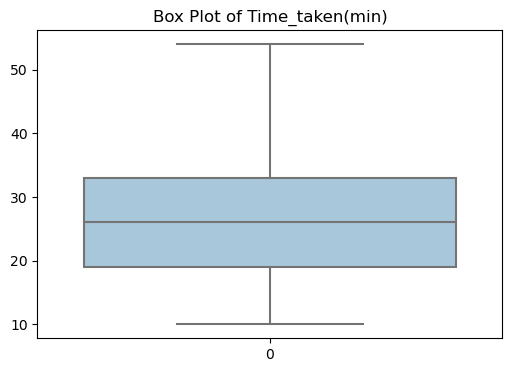

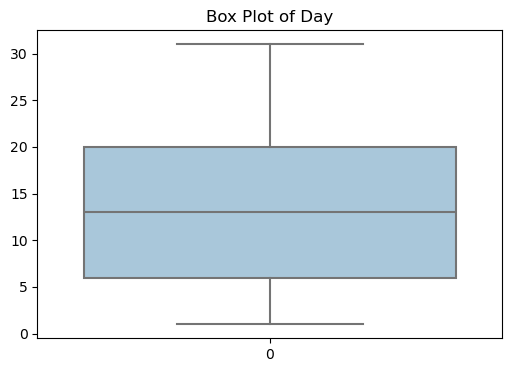

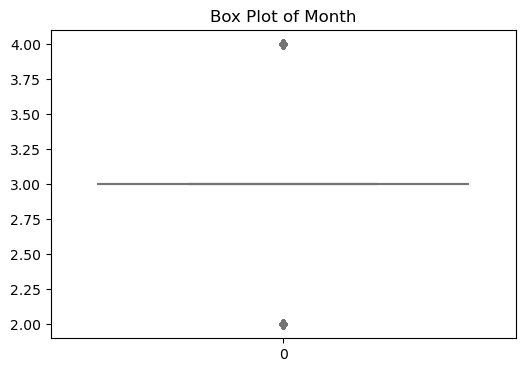

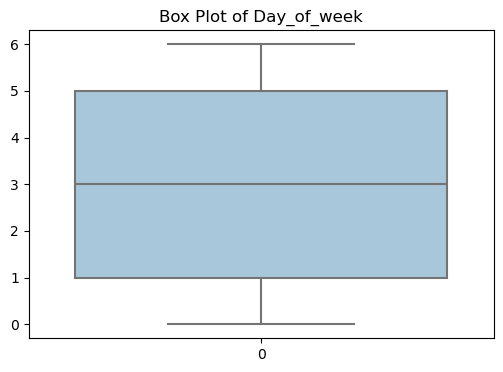

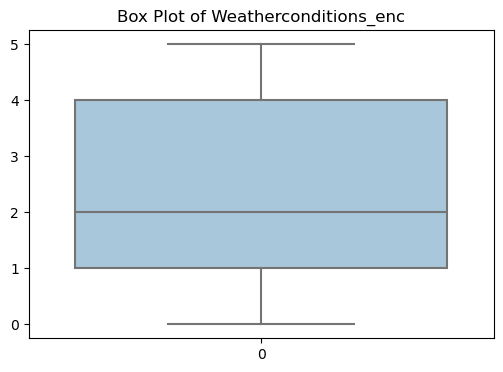

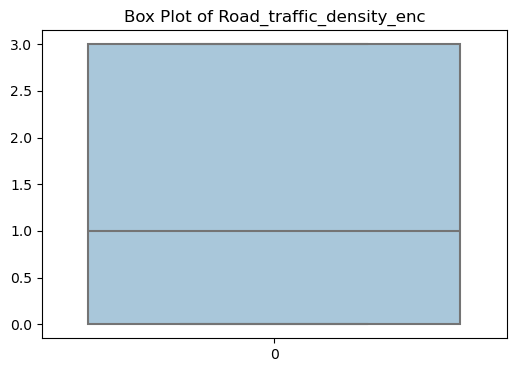

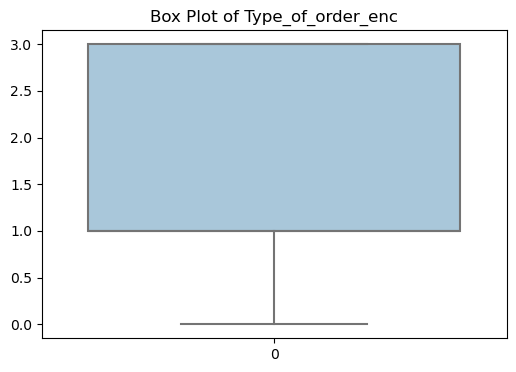

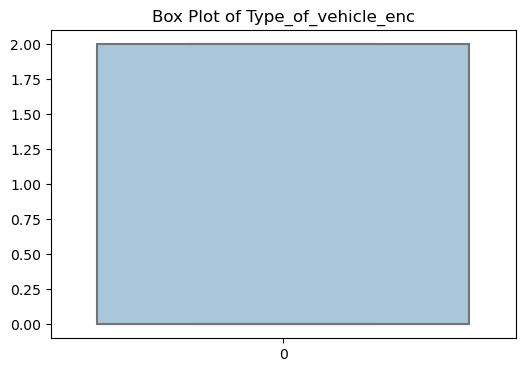

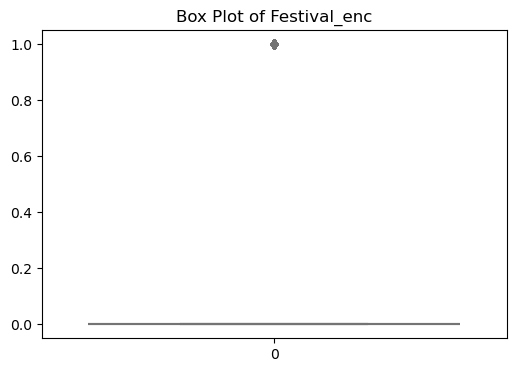

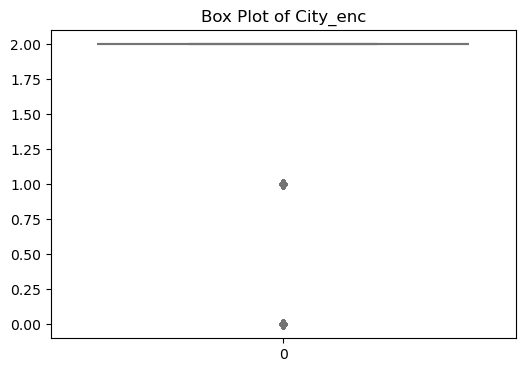

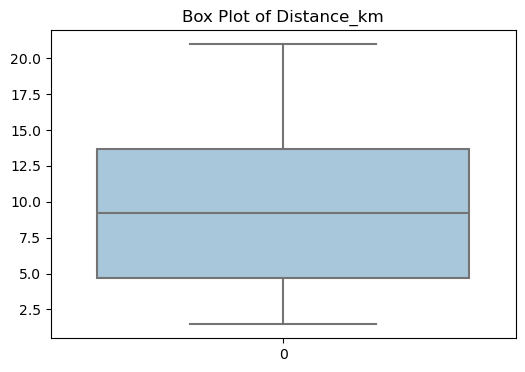

In [105]:
functions.plot_boxplots(data, columns_to_check, palette = palette)

With the outliers addressed, we will continue.

Since ID and Delivery_person_ID are unique for each observation and do not contribute with usful information for prediction purposes, they will be dropped.

In [106]:
data = data.drop(['ID', 'Delivery_person_ID'], axis = 1)

### 2.5 Visualisations

Visualising the distribution of the Age of the delivery person

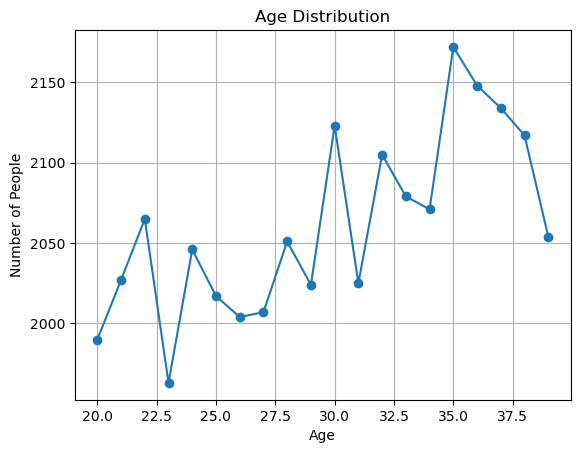

In [107]:
age_counts = data['Delivery_person_Age'].value_counts().sort_index()

plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

Taking a closer look at what time most orders are made

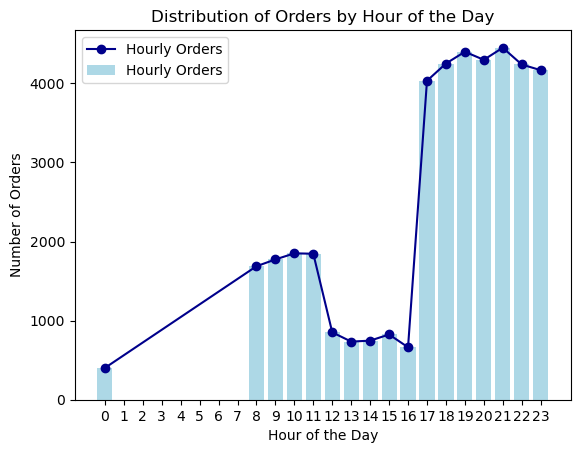

In [119]:
# Group orders by hour and count occurrences
hourly_counts = data['Hour'].value_counts().sort_index()

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the bar chart as the background
ax.bar(hourly_counts.index, hourly_counts.values, color='lightblue', label='Hourly Orders')

# Plot the line chart on top
ax.plot(hourly_counts.index, hourly_counts.values, marker='o', linestyle='-', color='darkblue', label='Hourly Orders')

# Customize the plot
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Orders')
ax.set_title('Distribution of Orders by Hour of the Day')
#ax.grid(True)
ax.set_xticks(range(24))
ax.legend()
plt.show()

Visualising order types for each hour of a day

In [ ]:
# Group orders by hour and type and count occurrences
hourly_order_counts = data.groupby(['Hour', 'Type_of_order']).size().unstack()

# Plot the stacked bar chart
hourly_order_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Types by Hour of the Day')
plt.legend(title='Order Type')

# Show the plot
plt.show()

Taking a look if the Age of the delivery person influences the Rating given by clients

In [ ]:
sns.boxplot(x='Delivery_person_Age', y='Delivery_person_Ratings', 
            data=data, palette = palette)
plt.xlabel('Delivery Person Age')
plt.ylabel('Delivery Person Ratings')
plt.title('Delivery Person Age vs Ratings')
plt.show()

Displaying Weather Conditions vs Time Taken

In [ ]:
sns.lineplot(x='Weatherconditions', y='Time_taken(min)', data=data, marker='o')

# Customize the plot
plt.xlabel('Road Traffic Density')
plt.xticks(rotation=45)
plt.ylabel('Time Taken (min)')
plt.title('Road Traffic Density vs Time Taken')
plt.show()

Taking a look at how traffic density and the existance of a festival affect the target *Time_taken(min)*

In [ ]:
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(data, col='Festival', row="Road_traffic_density")
g.map(sns.barplot, "Road_traffic_density", "Time_taken(min)")
g.add_legend()

plt.subplots_adjust(wspace=0.8)
plt.show()

### 2.6 Correlation Matrix

Here the numeric variables will be selected in order to perform a correlation matrix

In [120]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
numeric_columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken(min)', 'Day', 'Month', 'Day_of_week',
       'Weatherconditions_enc', 'Road_traffic_density_enc',
       'Type_of_order_enc', 'Type_of_vehicle_enc', 'Festival_enc', 'City_enc',
       'Distance_km', 'Hour'],
      dtype='object')

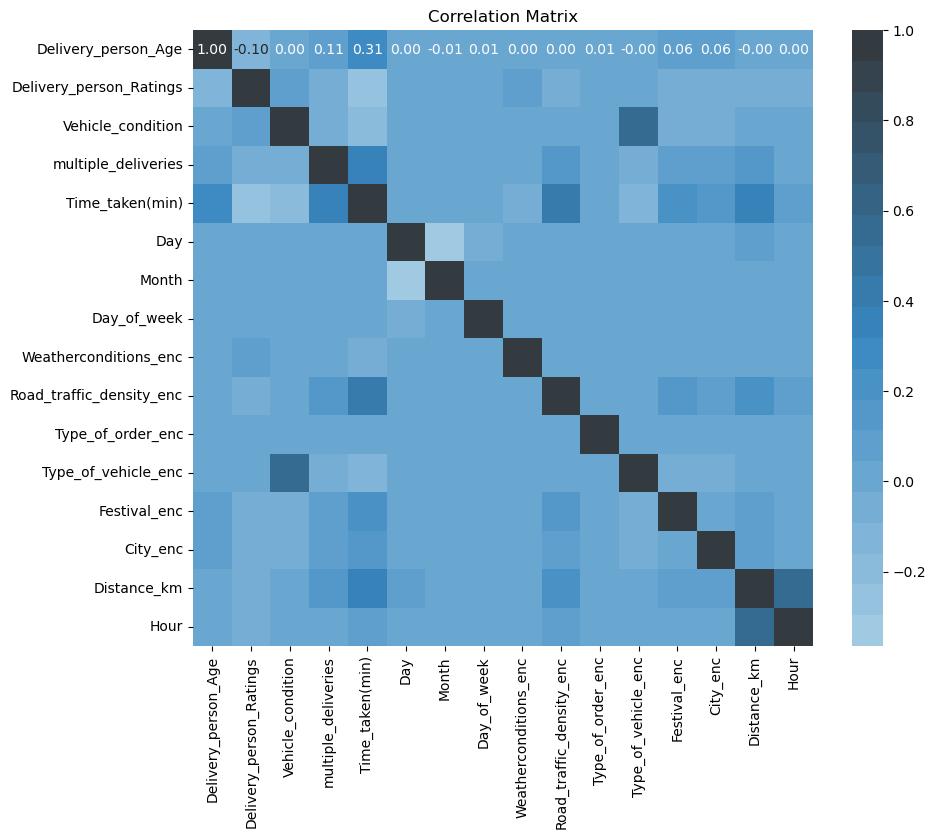

In [121]:
# Calculate correlation matrix
correlation_matrix = data[numeric_columns].corr(method='spearman')

# Plot correlation matrix as heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=palette, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()



In [ ]:
#print(correlation_matrix)

### Train-Test Split

Dropping unnecessary columns

In [ ]:
data = data.drop(['Time_Orderd', 'Time_Order_picked', 'Weatherconditions',
                 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 
                 'Festival', 'City', 'Time_Orderd_dt'], axis = 1)

Splitting the data into train and test

In [ ]:
X = data.drop(['Time_taken(min)'], axis = 1)
y = data['Time_taken(min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### Feature Selection

**Lasso**

In [ ]:
# Initialize the Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
predictions = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Print the coefficients
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': lasso.coef_})
print(coefficients)

In [ ]:
# Sort coefficients by absolute value for better visualization
coefficients_sorted = coefficients.sort_values(by='coefficient', ascending=False)

# Plot the coefficients
plt.barh(coefficients_sorted['feature'], coefficients_sorted['coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.show()


According to Lasso, the Type_of_order, Day_of_week, Month and Day do not influence our target variable. Consequently when modeling, experiments will be made to keep and remove these variables, while comparing the R-Squared, MSE and MAE of the models used.

**Mutual Information Criterion**

In [ ]:
mutual_info = mutual_info_regression(X, y)

# Visualize the mutual information scores
for feature, mi in zip(X.columns, mutual_info):
    formatted_mi = "{:.8f}".format(mi)
    print(f"Feature '{feature}': Mutual Information = {formatted_mi}")


In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, mutual_info, color='skyblue')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.title('Mutual Information Scores for Each Feature')
plt.show()

Experimenting by removing features that appear not to influence our target, therefore removing complexity

In [ ]:
X_train.info()

In [ ]:
columns_to_drop = ['Type_of_order_enc', 'Day_of_week', 'Month', 'Day']
X_train.drop(columns_to_drop, axis=1, inplace=True)
X_test.drop(columns_to_drop, axis=1, inplace=True)


** **

## Training Phase

**Data Scaling**

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest**

In [ ]:
# Define model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model 
random_forest.fit(X_train_scaled, y_train)

# Make predictions
rf_train_pred = random_forest.predict(X_train_scaled)
rf_predictions = random_forest.predict(X_test_scaled)


In [ ]:
print('----------------TRAIN--------------------')
functions.evaluator(y_train, rf_train_pred)
print(' ')
print('----------------TEST---------------------')
functions.evaluator(y_test, rf_predictions)

**Gradient Boosted Regression**

In [ ]:
# Define model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gradient_boosting.fit(X_train, y_train)

# Make predictions 
gbr_train_pred = gradient_boosting.predict(X_train)
gbr_predictions = gradient_boosting.predict(X_test)

In [ ]:
print('----------------TRAIN--------------------')
functions.evaluator(y_train, gbr_train_pred)
print(' ')
print('----------------TEST---------------------')
functions.evaluator(y_test, gbr_predictions)

**XGB Regressor**

In [ ]:
# Define model
xgb_reg = xgb.XGBRegressor(enable_categorical = True, random_state = 42)

# Train the model
xgb_reg.fit(X_train,y_train)

# Make predictions 
xgb_train_predictions = xgb_reg.predict(X_train)
xgb_predictions = xgb_reg.predict(X_test)

In [ ]:
print('----------------TRAIN--------------------')
functions.evaluator(y_train, xgb_train_predictions)
print(' ')
print('----------------TEST---------------------')
functions.evaluator(y_test, xgb_predictions)

**Linear Regression**

In [ ]:
# Define model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions
lr_train_predictions = lin_reg.predict(X_train)
lr_predictions = lin_reg.predict(X_test)

In [ ]:
print('----------------TRAIN--------------------')
functions.evaluator(y_train, lr_train_predictions)
print(' ')
print('----------------TEST---------------------')
functions.evaluator(y_test, lr_predictions)

**Neural Network**

In [ ]:
# Define the neural network architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(16, activation='relu'),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(1)  
])


# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions on the test data
nn_train_pred = model.predict(X_train)
nn_pred = model.predict(X_test)

In [ ]:
print('----------------TRAIN--------------------')
functions.evaluator(y_train, nn_train_pred)
print(' ')
print('----------------TEST---------------------')
functions.evaluator(y_test, nn_pred)

** **

## Testing Phase

In [ ]:
test = pd.read_csv('/Users/antoniooliveira/Downloads/assignment 3/test.csv')
test

In [ ]:
test.describe()